In [1]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-v0_8-whitegrid')

import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [2]:
from anomalydetector.autoencoder import detect_anomalies_with_lstm_autoencoder

In [9]:
df = pd.read_csv(os.path.expanduser('~/dance1/result/02_1_dlt_pair_1_2.csv'))
# df = pd.read_csv(os.path.expanduser('~/dance1/result/02_1_dlt.csv'))
df.head()

,frame,NOSE_x,NOSE_y,NOSE_z,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_z,RIGHT_EYE_x,RIGHT_EYE_y,RIGHT_EYE_z,...,LEFT_HEEL_z,RIGHT_BIG_TOE_x,RIGHT_BIG_TOE_y,RIGHT_BIG_TOE_z,RIGHT_LITTLE_TOE_x,RIGHT_LITTLE_TOE_y,RIGHT_LITTLE_TOE_z,RIGHT_HEEL_x,RIGHT_HEEL_y,RIGHT_HEEL_z
0,49,0.731337,1.670209,0.329494,0.693866,1.702147,0.348479,0.765553,1.702618,0.346740,...,0.603348,0.806023,0.029666,0.383734,0.855000,0.026599,0.445935,0.751741,0.008080,0.647953
1,50,0.730674,1.669764,0.330874,0.692629,1.701191,0.342378,0.766577,1.699635,0.333631,...,0.597095,0.807566,0.029377,0.377904,0.855212,0.023206,0.455382,0.748443,0.004354,0.658059
2,51,0.731434,1.666859,0.325068,0.691034,1.700220,0.343449,0.764936,1.698669,0.334663,...,0.589396,0.803648,0.029061,0.386026,0.853428,0.023681,0.456195,0.749197,0.007411,0.650379
3,52,0.730208,1.664415,0.327037,0.692237,1.697252,0.338843,0.766660,1.697651,0.337260,...,0.599763,0.802947,0.026036,0.396832,0.852043,0.021423,0.458969,0.748486,0.002558,0.662099
4,53,0.728686,1.659811,0.326405,0.690798,1.693990,0.337810,0.765105,1.691483,0.336248,...,0.606864,0.801457,0.025928,0.395020,0.851087,0.018849,0.465614,0.746670,0.003930,0.660491


In [10]:
part_name = "LEFT_ANKLE"
# part_name = "RIGHT_EAR"
part_data = df.filter(like=part_name)
# part_data = df[[f"{part_name}_z"]]
part_data.head()

,LEFT_ANKLE_x,LEFT_ANKLE_y,LEFT_ANKLE_z
0,0.629892,0.076054,0.538396
1,0.628830,0.074717,0.540960
2,0.626716,0.077490,0.533206
3,0.625959,0.074578,0.544031
4,0.627353,0.075045,0.534151


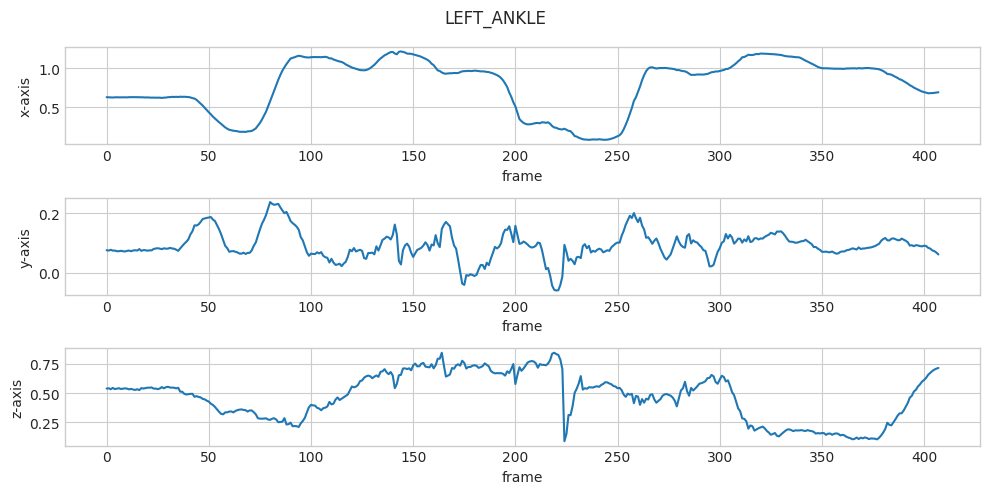

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(10, 5))
fig.suptitle(part_name)

ax[0].plot(df.index, df[f"{part_name}_x"], label="DLT")
ax[0].set_ylabel("x-axis")

ax[1].plot(df.index, df[f"{part_name}_y"], label="DLT")
ax[1].set_ylabel("y-axis")

ax[2].plot(df.index, df[f"{part_name}_z"], label="DLT")
ax[2].set_ylabel("z-axis")

for i in range(3):
    ax[i].set_xlabel("frame")

plt.tight_layout()
plt.show()

In [12]:
seq_length = 5

anomaly_indices, reconstruction_errors = detect_anomalies_with_lstm_autoencoder(
    part_data,
    seq_length=seq_length,
    hidden_dim=50,
    epochs=300,
    lr=1e-3,
    verbose=True,
    threshold_percentile=99,
    seed=42,
)

anomaly_indices += seq_length - 1

Epoch [ 20/300], Loss: 0.8286
Epoch [ 40/300], Loss: 0.6496
Epoch [ 60/300], Loss: 0.4821
Epoch [ 80/300], Loss: 0.3817
Epoch [100/300], Loss: 0.2776
Epoch [120/300], Loss: 0.2499
Epoch [140/300], Loss: 0.2375
Epoch [160/300], Loss: 0.2304
Epoch [180/300], Loss: 0.2254
Epoch [200/300], Loss: 0.2215
Epoch [220/300], Loss: 0.2183
Epoch [240/300], Loss: 0.2155
Epoch [260/300], Loss: 0.2132
Epoch [280/300], Loss: 0.2112
Epoch [300/300], Loss: 0.2095


In [13]:
print(f"anomaly indices size: {len(anomaly_indices)}")

anomaly indices size: 5


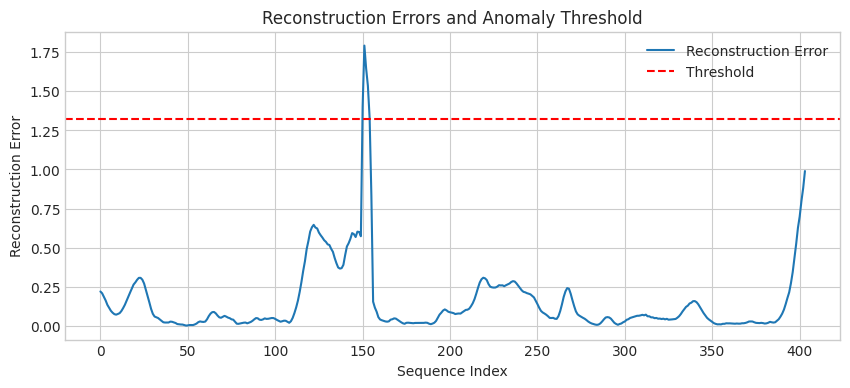

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(reconstruction_errors, label='Reconstruction Error')
plt.axhline(y=np.percentile(reconstruction_errors, 99), color='r', linestyle='--', label='Threshold')
plt.legend()
plt.title('Reconstruction Errors and Anomaly Threshold')
plt.xlabel('Sequence Index')
plt.ylabel('Reconstruction Error')
plt.show()

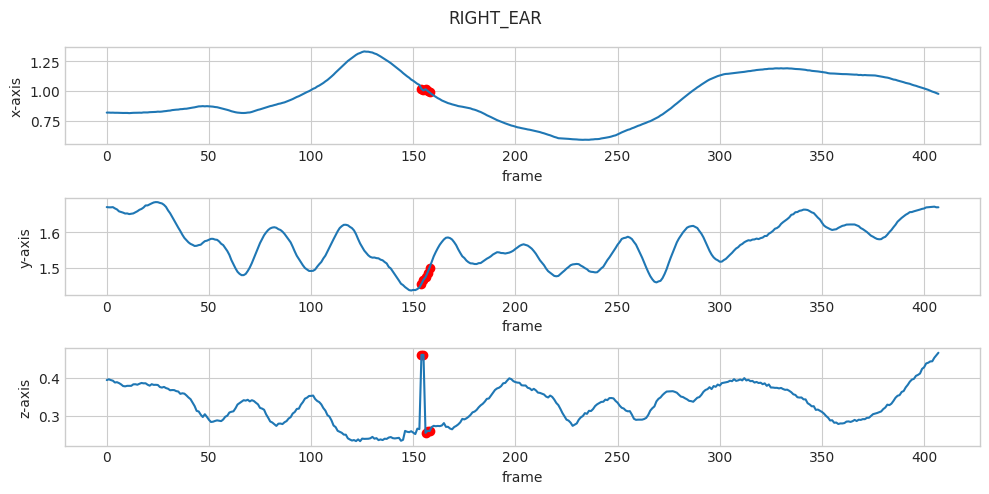

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(10, 5))
fig.suptitle(part_name)

ax[0].plot(df.index, df[f"{part_name}_x"], label="DLT")
ax[0].scatter(anomaly_indices, df[f"{part_name}_x"].iloc[anomaly_indices], color='r', label='Anomaly')
ax[0].set_ylabel("x-axis")

ax[1].plot(df.index, df[f"{part_name}_y"], label="DLT")
ax[1].scatter(anomaly_indices, df[f"{part_name}_y"].iloc[anomaly_indices], color='r', label='Anomaly')
ax[1].set_ylabel("y-axis")

ax[2].plot(df.index, df[f"{part_name}_z"], label="DLT")
ax[2].scatter(anomaly_indices, df[f"{part_name}_z"].iloc[anomaly_indices], color='r', label='Anomaly')
ax[2].set_ylabel("z-axis")

for i in range(3):
    ax[i].set_xlabel("frame")

plt.tight_layout()
plt.show()